In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np

In [2]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


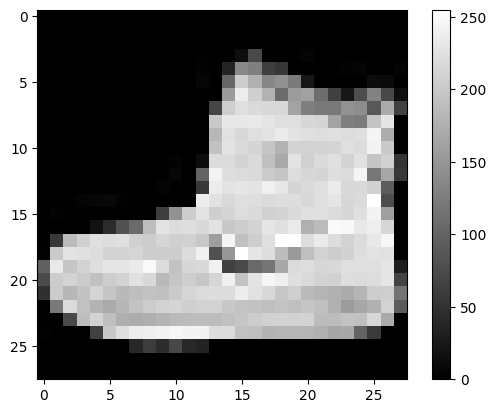

In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.show()

In [5]:
Y_train[0]

9

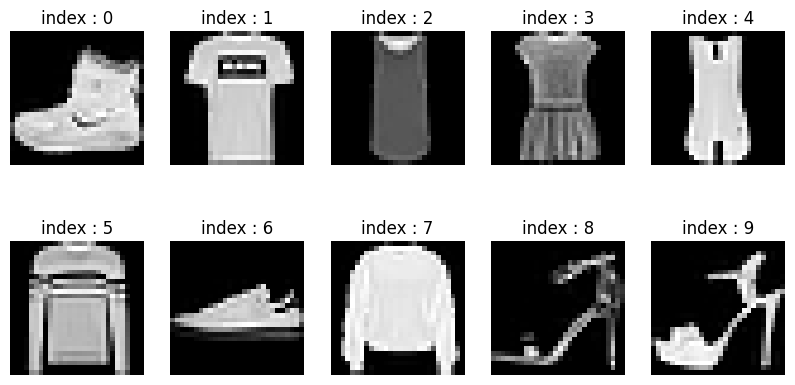

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'index : {i}')
    plt.axis('off')
plt.show()

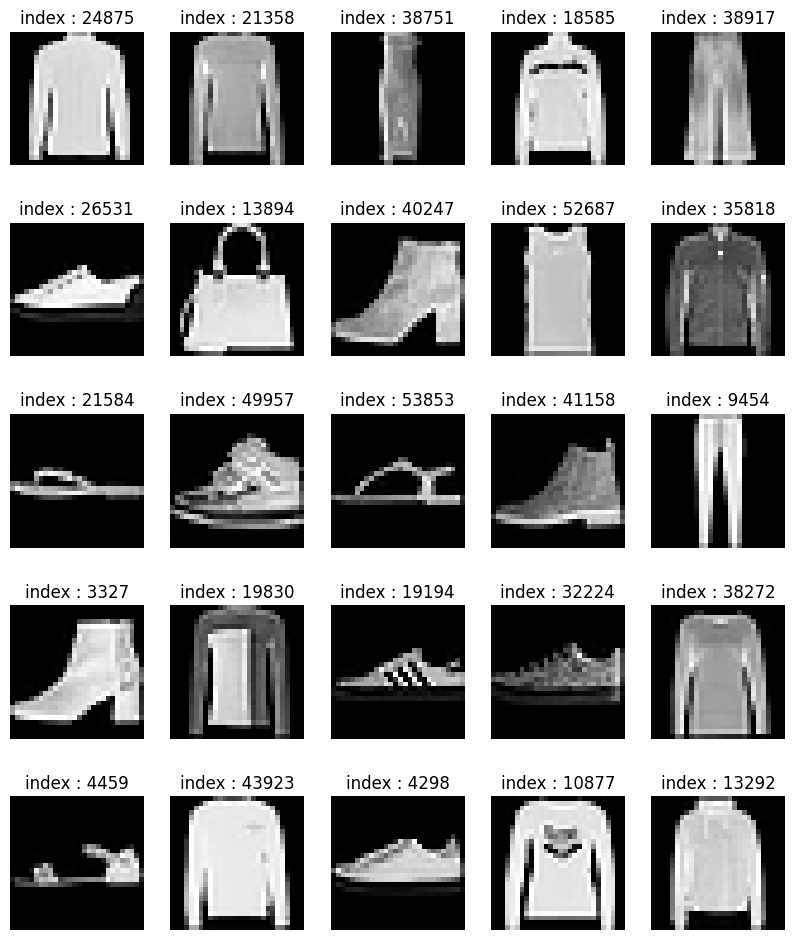

In [7]:
plt.figure(figsize=(10, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 60000)
    plt.imshow(X_train[random_index].reshape(28, 28), cmap='gray')
    plt.title(f'index : {random_index}')
    plt.axis('off')
plt.show()

In [8]:
## 데이터를 (배치사이즈 x 28 x 28 x 1)로 이미지를 변환해줌. -> 그레이스케일이므로 채널은 1
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

## 정답을 바이너리화 함.
y_train = tf.keras.utils.to_categorical(Y_train)
y_test = tf.keras.utils.to_categorical(Y_test)

In [9]:
# CNN 모델 설계.
## 모델
input_Layer = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same')(input_Layer)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
output_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[output_layer])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0     

In [10]:
loss = tf.keras.losses.categorical_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=loss,
              optimizer = optimize,
              metrics=["accuracy"])

In [11]:
# 모델 최적화 설정
MODEL_DIR = './CNN_Fasion_MNIST_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./CNN_Fasion_MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5"
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)]

In [12]:
# 모델의 실행
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=200, verbose=1, callbacks=callback_list)
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

Epoch 1/100
239/240 [============================>.] - ETA: 0s - loss: 1.5475 - accuracy: 0.7721
Epoch 1: val_loss improved from inf to 0.74285, saving model to ./CNN_Fasion_MNIST_model/01-0.7429.hdf5
240/240 [==============================] - 7s 10ms/step - loss: 1.5446 - accuracy: 0.7722 - val_loss: 0.7429 - val_accuracy: 0.8123
Epoch 2/100
  8/240 [>.............................] - ETA: 1s - loss: 0.7029 - accuracy: 0.8325

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


234/240 [============================>.] - ETA: 0s - loss: 0.5786 - accuracy: 0.8475
Epoch 2: val_loss improved from 0.74285 to 0.52199, saving model to ./CNN_Fasion_MNIST_model/02-0.5220.hdf5
240/240 [==============================] - 3s 11ms/step - loss: 0.5776 - accuracy: 0.8472 - val_loss: 0.5220 - val_accuracy: 0.8579
Epoch 3/100
238/240 [============================>.] - ETA: 0s - loss: 0.4356 - accuracy: 0.8708
Epoch 3: val_loss improved from 0.52199 to 0.45922, saving model to ./CNN_Fasion_MNIST_model/03-0.4592.hdf5
240/240 [==============================] - 4s 15ms/step - loss: 0.4355 - accuracy: 0.8710 - val_loss: 0.4592 - val_accuracy: 0.8718
Epoch 4/100
236/240 [============================>.] - ETA: 0s - loss: 0.3453 - accuracy: 0.8896
Epoch 4: val_loss did not improve from 0.45922
240/240 [==============================] - 2s 9ms/step - loss: 0.3452 - accuracy: 0.8895 - val_loss: 0.4955 - val_accuracy: 0.8544
Epoch 5/100
233/240 [============================>.] - ETA: 0s 

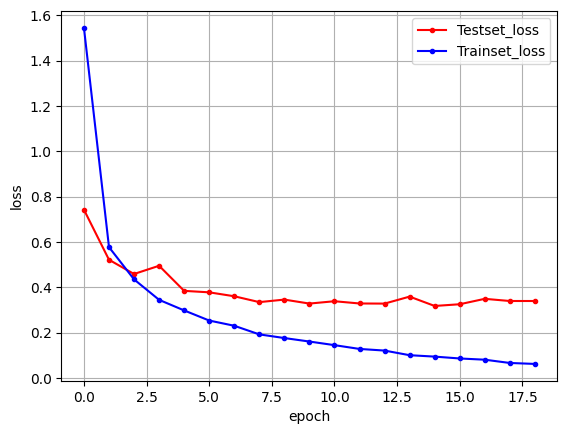

In [13]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
